<a href="https://colab.research.google.com/github/Keshigami/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/Human_Pose_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

In [ ]:
os.chdir('/content/drive/My Drive/ActionRecognition')
os.listdir()

['Pose_Dataset', 'Pose_Model', 'Action_Dataset']

In [ ]:
cwd = os.getcwd()
print(cwd)

/content/drive/My Drive/ActionRecognition


Directory containing images

In [ ]:
train_imgs = ('/').join([cwd,'Pose_Dataset/train'])
test_imgs = ('/').join([cwd,'Pose_Dataset/test'])

Loading Dataframe with joint coordinates and image name

In [ ]:
path = ('/').join([cwd,'Pose_Dataset/train_joints_coords.csv'])
train_df = pd.read_csv(path,header=None)
path = ('/').join([cwd,'Pose_Dataset/test_joints_coords.csv'])
test_df = pd.read_csv(path,header=None)

In [ ]:
print('Train_Shape:', train_df.shape)
print('Test_Shape:',test_df.shape)

Train_Shape: (4429, 15)
Test_Shape: (574, 15)


Now, Let's print the first image along with joint coordinates.

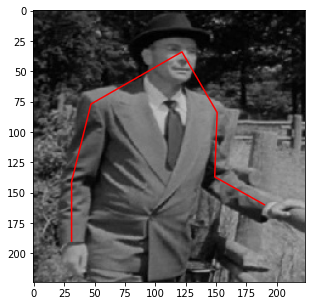

In [ ]:
img = cv2.imread(train_imgs + '/train0.jpg')
coord = train_df.iloc[0,1:].values
x = []
y = []
for i in range(0,len(coord),2):
  x.append(coord[i])
  y.append(coord[i+1])
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.plot(x,y,'r')
plt.show()

Reading CSV file for Action Recognition

In [ ]:
path = ('/').join([cwd,'Action_Dataset/action_joints.csv'])
df = pd.read_csv(path)
df.columns = list(range(df.shape[1]))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,hello1.jpg,152,205,165,152,157,96,123,64,106,90,81,74,48,28,Hello
1,hello2.jpg,142,184,144,133,134,93,105,56,86,84,60,65,45,19,Hello
2,hello3.jpg,155,202,151,149,141,109,101,71,60,105,47,73,53,40,Hello
3,hello4.jpg,167,216,159,161,165,111,147,66,87,88,41,102,65,49,Hello
4,hello5.jpg,140,194,137,144,131,100,105,70,77,92,60,75,60,37,Hello


HELLO

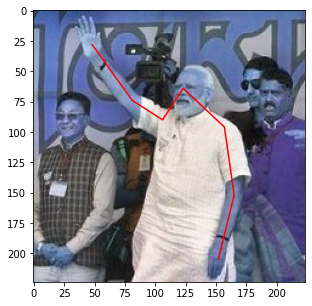

In [ ]:
img = cv2.imread(cwd + '/Action_Dataset/hello1.jpg')
coord = df.iloc[0,1:-1].values
x = []
y = []
for i in range(0,len(coord),2):
  x.append(coord[i])
  y.append(coord[i+1])
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.plot(x,y,'r')
plt.show()

NAMASTE

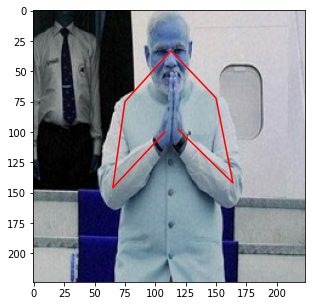

In [ ]:
img = cv2.imread(cwd+'/Action_Dataset/namaste1.jpg')
coord = df.iloc[10,1:-1].values
x = []
y = []
for i in range(0,len(coord),2):
  x.append(coord[i])
  y.append(coord[i+1])
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.plot(x,y,'r')
plt.show()

IMAGE GENERATOR METHOD

In [ ]:
import keras
from keras.applications.vgg16 import VGG16
from keras.engine.sequential import Sequential
from keras.layers import Flatten,Dense,Dropout,BatchNormalization,InputLayer,Conv2D,MaxPool2D,Activation,add
from keras.models import Model,load_model,model_from_json
from keras.preprocessing.image import img_to_array,ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
batch_size = 40
target_size=(224,224)

Using TensorFlow backend.


In [ ]:
generator = ImageDataGenerator(horizontal_flip=True,rescale=1./255,validation_split=0.1)
train_generator = generator.flow_from_dataframe(train_df,directory=train_imgs,x_col=0,y_col=list(np.arange(1,15,1)),class_mode='raw',target_size=target_size,subset='training',batch_size=batch_size)

Found 3987 validated image filenames.


In [ ]:
val_generator = generator.flow_from_dataframe(train_df,directory=train_imgs,x_col=0,y_col=list(np.arange(1,15,1)),class_mode='raw',target_size=target_size,subset='validation',batch_size=batch_size)

Found 442 validated image filenames.


In [ ]:
test_generator = generator.flow_from_dataframe(test_df,directory=test_imgs,x_col=0,y_col=list(np.arange(1,15,1)),class_mode='raw',target_size=target_size,batch_size=batch_size)

Found 574 validated image filenames.


In [ ]:
#from tensorflow.keras.applications.vgg19 import VGG19
base_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
        layer.trainable= False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
x = Flatten()(base_model.output)
x = Dense(4096,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64,activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Dense(14,activation='relu')(x)

In [ ]:
pose_model = Model(input = base_model.input, output = x)
pose_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from keras import backend as K

#Custom Metrics R2_Score
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

optimizer= Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
loss='mean_squared_error'
metrics=[coeff_determination]
pose_model.compile(optimizer=optimizer,loss=loss,metrics=metrics)

In [ ]:
early_stopping_monitor= EarlyStopping(monitor='val_coeff_determination', min_delta=0, patience=10,
                                      verbose=0, mode= 'max', baseline=None, restore_best_weights=True)

In [ ]:
pose_model.fit_generator(train_generator, validation_data=val_generator, epochs=5,
                         callbacks=[early_stopping_monitor],
                         steps_per_epoch= train_generator.samples//batch_size,
                         validation_steps= val_generator.samples//df.shape[0])

Epoch 1/5
 4/99 [>.............................] - ETA: 42:06 - loss: 15676.5129 - coeff_determination: -4.2551